# Capstone Webscrapping using BeautifulSoup

Berikut adalah proses scrapping Data kurs Japan Yen ke rupiah pada tahun 2020 dari situs news.mifx.com dalam 5 hari. Attribute data yang akan discrapping dari web tersebut adalah:
1. Tanggal yaitu periode kurs
2. Ask yaitu kurs jual, 
3. Bid yaitu Kurs beli

In [1]:
import requests

url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

proses ini melakukan pencarian tag 'table' dengan nama class : centerText newsTable2 dan disimpan pada variable 'table'. Kemudian dilakukan prettify dari index baris ke 0-499 untuk merapikan file html dengan memberikan identasi dan newline agar dapat dibaca dengan mudah.

In [5]:
table = soup.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   07 Agustus 2020
  </td>
  <td>
   139,42
  </td>
  <td>
   138,02
  </td>
 </tr>
 <tr>
  <td>
   06 Agustus 2020
  </td>
  <td>
   138,88
  </td>
  <td>
   137,48
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   05 Agustus 2020
  </td>
  <td>
   139,


Dari variable 'table' tersebut selanjutnya dilakukan proses pengambilan baris/row menggunakan find_all('tr') yaitu mencari semua tag 'tr' dan disimpan pada variable 'tr'. Kemudian dilakukan looping dari setiap baris untuk mendapatkan kolom nilai dari tag 'td'

In [6]:
tr = table.find_all('tr')

In [7]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip().replace('\xa0','/').replace('/','-').replace('Juli','07').replace('Agustus','08') #for removing the excess whitespace
    
    #get ask
    ask = row.find_all('td')[1].text
    ask = ask.strip().replace(',','.') #for removing the excess whitespace
    
    #get bid
    bid = row.find_all('td')[2].text
    bid = bid.strip().replace(',','.') #for removing the excess whitespace
    
    temp.append((tanggal,ask,bid)) 
    #scrapping process
    
temp 

[('07-08-2020', '139.42', '138.02'),
 ('06-08-2020', '138.88', '137.48'),
 ('05-08-2020', '139.23', '137.84'),
 ('04-08-2020', '139.19', '137.79'),
 ('03-08-2020', '139.72', '138.32')]

In [8]:
temp = temp[::-1]
temp

[('03-08-2020', '139.72', '138.32'),
 ('04-08-2020', '139.19', '137.79'),
 ('05-08-2020', '139.23', '137.84'),
 ('06-08-2020', '138.88', '137.48'),
 ('07-08-2020', '139.42', '138.02')]

Dari variable temp kemudian diubah menjadi dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal','ask','bid'))
df.head()

,tanggal,ask,bid
0,03-08-2020,139.72,138.32
1,04-08-2020,139.19,137.79
2,05-08-2020,139.23,137.84
3,06-08-2020,138.88,137.48
4,07-08-2020,139.42,138.02


Kemudian dilakukan konversi tipe data untuk masing-masing attribute seperti tipe data untuk tanggal menjadi datetime64, ask dan bid menjadi float64

In [10]:
df['tanggal'] = pd.to_datetime(df['tanggal'], dayfirst=True)
df[['ask','bid']] = df[['ask','bid']].apply(lambda x: x.astype('float64'))

Berdasarkan dataframe tersebut kemudian dilakukan pivot table dan visualisasi dengan menggunakan plot line

<AxesSubplot:xlabel='tanggal'>

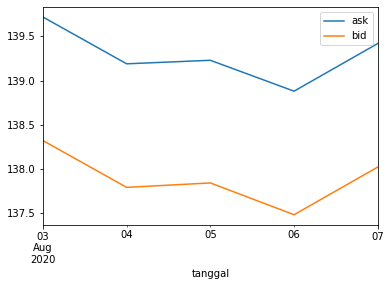

In [11]:
df.pivot_table(
    index='tanggal',
    values=['ask', 'bid'],
    aggfunc='max'
    
).head().plot(kind='line')

 
Dari grafik line di atas dapat diambil kesimpulan bahwa dalam rentang 5 hari bisa dilihat harga jual tertinggi pada tanggal 3 Agustus 2020 dan harga beli terendah adalah tanggal 6 Agustus 2020. Maka saat yang terbaik untuk menjual mata uang yen adalah tanggal 3 Agustus dan harga terbaik untuk membeli mata uang yen adalah tanggal 6 agustus 2020.


put your flask dashboard link here too: http://127.0.0.1:5000/